# Non-Negative Matrix Factorization for Recommender Systems


**Recommender Systems** divide into:

- **collaborative filtering** <font color='green'> (addressed today )</font>  
&emsp; collaborative ➜ cooperate, use existing rating information only   
&emsp; filtering ➜ filter out items that a user might like

- **content-based filtering** <font color='red'> (not addressed) </font>  
&emsp; based on users' characteristics like age, income, residence, ...


- **hybrid approaches** <font color='red'> (not addressed) </font>  
&emsp; using a combination of the above

**Collaborative filtering techniques are divided into the following approaches:**

- **Model based**, uses mathematical methods such as:

    - singular value decomposition (SVD)
    - principal component analysis (PCA)<font color='green'> (addressed wednesday)</font>  
    - latent Dirichlet allocation (LDA)  
    - non-negative matrix factorization (NMF)<font color='green'> (addressed now)</font>  
 
 
- **memory based** (also called **neighbourhood-based**): uses similar (neighbourly) rating patterns   
&emsp; like cosine similarity <font color='green'> (addressed thursday )</font>  

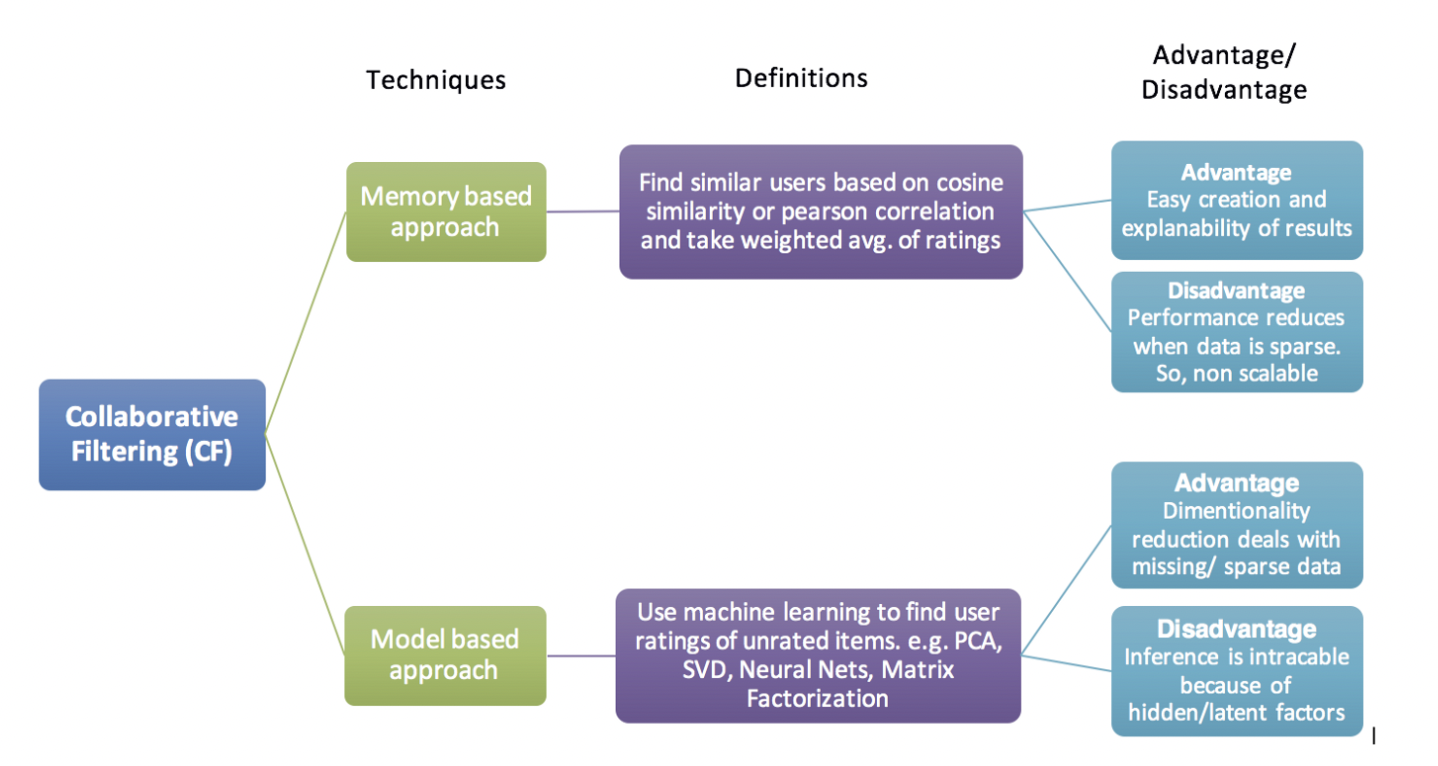

[source](https://en.wikipedia.org/wiki/Collaborative_filtering)

**(Non-negative) Matrix Factorization** (or Approximation) is a model based collaborative filtering technique  
non-negative ➜ because all elements of the matrix are generally positive or zero  
matrix factorization ➜ because a large (and sparse) matrix containing all user and rating information is divided into two much smaller matrices/factors   


In non-negative matrix factorization, we are trying to factorise (separate) the **rating matrix** into **two matrices**, one for **users** and one for **movies**, each of which also has **latent features**. The sub-matrices are found so that **their product approximates ratings matrix R** with the lowest possible error


<img src="nmf.png" width=650 heigth=650>

## Warmup:

You can work on the intuitive [NMF Exercise sheet](https://spiced.space/naive-bayleaves/ds-course/_downloads/04922c12ffa2136cda8d3aba761b7b8e/NMF_Exercise.pdf) together. We will discuss the results at the end!

## In `sklearn`

In [1]:
import numpy as np
from sklearn.decomposition import NMF 
import pandas as pd

### Read movie ratings in

In [2]:
user_rating = pd.read_csv("../data/bayleaves_ratings.csv",index_col='users')
user_rating

,Night on Earth,Inside Out (Alles steht Kopf),Apocalypse Now,The Lords of the Rings,The Big Lebowski,The Great Beauty,Avatar,Toy Story,Black Hawk down,Titanic,Guardians of the Galaxy,Kill Bill,Top Gun
users,,,,,,,,,,,,,
Carmine,3.5,4.0,5.0,5.0,3.0,5.0,5.0,NaN,NaN,2.5,3.5,NaN,NaN
Ahmet,NaN,NaN,4.0,NaN,4.0,3.5,NaN,NaN,NaN,3.0,NaN,3.0,3.0
Valentin,NaN,5.0,3.0,5.0,5.0,NaN,NaN,5.0,NaN,3.5,4.0,4.0,NaN
Jose,NaN,NaN,NaN,5.0,4.0,NaN,3.5,5.0,NaN,5.0,4.0,NaN,NaN
Johannes,NaN,NaN,NaN,5.0,5.0,NaN,4.0,NaN,NaN,5.0,NaN,4.0,NaN
Sebastian,NaN,NaN,NaN,5.0,3.0,NaN,NaN,3.0,4.0,NaN,3.5,4.5,NaN
Ali,4.0,4.0,4.0,5.0,3.5,3.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0
Thorsten,NaN,NaN,5.0,4.0,5.0,4.0,3.5,NaN,4.0,3.5,3.5,4.0,4.5
Sezer,2.5,1.5,1.0,3.0,1.0,1.0,5.0,4.0,5.0,5.0,5.0,3.0,5.0


In [3]:
movies = user_rating.columns.to_list()
movies

['Night on Earth',
 'Inside Out (Alles steht Kopf)',
 'Apocalypse Now',
 'The Lords of the Rings',
 'The Big Lebowski',
 'The Great Beauty',
 'Avatar',
 'Toy Story',
 'Black Hawk down',
 'Titanic',
 'Guardians of the Galaxy',
 'Kill Bill',
 'Top Gun']

In [4]:
users = user_rating.index.to_list()
users

['Carmine',
 'Ahmet',
 'Valentin',
 'Jose',
 'Johannes',
 'Sebastian',
 'Ali',
 'Thorsten',
 'Sezer']

### Remark on empty values
Scikit-Learn implementation of NMF is not able to deal with missing values. What can we do about it?

- Fill in the missing values
    + Take the **movie rating average**
    + Arbitrary value (0 or 3)
    + Take the **global rating average**
    + Take the **user rating average** 
   

- Use a different package; e.g. scikit-surprise

*Filling the nan*

In [5]:
user_rating.mean()

Night on Earth                   3.333333
Inside Out (Alles steht Kopf)    3.625000
Apocalypse Now                   3.666667
The Lords of the Rings           4.625000
The Big Lebowski                 3.722222
The Great Beauty                 3.300000
Avatar                           4.166667
Toy Story                        4.400000
Black Hawk down                  4.500000
Titanic                          4.062500
Guardians of the Galaxy          3.928571
Kill Bill                        3.785714
Top Gun                          4.375000
dtype: float64

In [6]:
Ratings = user_rating.fillna(user_rating.mean())

In [7]:
Ratings

,Night on Earth,Inside Out (Alles steht Kopf),Apocalypse Now,The Lords of the Rings,The Big Lebowski,The Great Beauty,Avatar,Toy Story,Black Hawk down,Titanic,Guardians of the Galaxy,Kill Bill,Top Gun
users,,,,,,,,,,,,,
Carmine,3.500000,4.000,5.000000,5.000,3.0,5.0,5.000000,4.4,4.5,2.5000,3.500000,3.785714,4.375
Ahmet,3.333333,3.625,4.000000,4.625,4.0,3.5,4.166667,4.4,4.5,3.0000,3.928571,3.000000,3.000
Valentin,3.333333,5.000,3.000000,5.000,5.0,3.3,4.166667,5.0,4.5,3.5000,4.000000,4.000000,4.375
Jose,3.333333,3.625,3.666667,5.000,4.0,3.3,3.500000,5.0,4.5,5.0000,4.000000,3.785714,4.375
Johannes,3.333333,3.625,3.666667,5.000,5.0,3.3,4.000000,4.4,4.5,5.0000,3.928571,4.000000,4.375
Sebastian,3.333333,3.625,3.666667,5.000,3.0,3.3,4.166667,3.0,4.0,4.0625,3.500000,4.500000,4.375
Ali,4.000000,4.000,4.000000,5.000,3.5,3.0,4.000000,5.0,5.0,5.0000,4.000000,4.000000,5.000
Thorsten,3.333333,3.625,5.000000,4.000,5.0,4.0,3.500000,4.4,4.0,3.5000,3.500000,4.000000,4.500
Sezer,2.500000,1.500,1.000000,3.000,1.0,1.0,5.000000,4.0,5.0,5.0000,5.000000,3.000000,5.000


In [13]:
Ratings.shape

(9, 13)

### Create a model

Model assumes $R \sim P\cdot Q$ where $Q$ is a matrix that has every movie classified according to genres (hidden/latent features) and $P$ shows the user preferences for these features 

`sklearn` has an `NMF` model that can create the components' matrices for both the users and the movies of the original data frame

#### Step 1. Create a movie-features matrix $Q$

We get the matrix $Q$, which tells us how much each of the movies belongs to each of the n hidden features / genres, with `nmf.components_`

1. *Instatiate the NMF model*

In [10]:
nmf_model = NMF(n_components=4, max_iter=300)

2. *Fit the model on the full imputed user/movie dataframe/matrix*

In [11]:
nmf_model.fit(Ratings)

/Users/dina.deifallah/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(max_iter=300, n_components=4)

3. *Get the movie-feature dataframe/matrix $Q$ from the model components*

In [12]:
nmf_model.components_.shape

(4, 13)

In [14]:
Q_matrix = nmf_model.components_

In [15]:
nmf_model.feature_names_in_

array(['Night on Earth', 'Inside Out (Alles steht Kopf)',
       'Apocalypse Now', 'The Lords of the Rings', 'The Big Lebowski',
       'The Great Beauty', 'Avatar', 'Toy Story', 'Black Hawk down',
       'Titanic', 'Guardians of the Galaxy', 'Kill Bill', 'Top Gun'],
      dtype=object)

In [19]:
Q = pd.DataFrame(data=Q_matrix,
            columns=nmf_model.feature_names_in_)

In [20]:
Q

,Night on Earth,Inside Out (Alles steht Kopf),Apocalypse Now,The Lords of the Rings,The Big Lebowski,The Great Beauty,Avatar,Toy Story,Black Hawk down,Titanic,Guardians of the Galaxy,Kill Bill,Top Gun
0,1.213749,1.364374,1.593464,1.730659,1.745764,1.241405,0.947646,1.339154,1.273996,1.676797,1.038169,1.549281,1.517027
1,0.478243,0.228620,0.000000,0.576879,0.000000,0.040914,1.054031,0.806023,1.058162,1.080049,1.066912,0.539896,1.008485
2,0.628868,0.547556,1.317054,0.844040,0.000000,1.210085,0.941922,0.298668,0.583118,0.023407,0.322754,0.737618,0.699526
3,0.497237,1.188919,0.000027,0.766246,1.396856,0.461340,1.171017,1.801592,1.269663,0.000000,1.275554,0.022563,0.276290


#### Step 2. Create user-features matrix $P$

- See how the transform takes the samples (users) and transforms the  data for them as opposed to `model.components_` that combines the features/columns (movies) of the original data with newly created latent features



- When you think about the process remember the question: Which movie do I recommend to which user. Users are the rows in your df and you first need a model before creating the user-features matrix

1. *Get the user-feature matrix/dataframe $P$ by using the model method transform on the full imputed user/movie dataframe/matrix*

In [21]:
nmf_model.transform(Ratings).shape

(9, 4)

In [22]:
P_matrix = nmf_model.transform(Ratings)
P_matrix

array([[1.05730012e+00, 5.75941392e-01, 2.57177643e+00, 8.66198720e-01],
       [1.36739659e+00, 4.27266579e-01, 1.13418631e+00, 1.13395072e+00],
       [1.94679096e+00, 4.80145395e-01, 3.42408780e-01, 1.19335630e+00],
       [2.13135099e+00, 1.11124430e+00, 1.39219390e-01, 4.27651463e-01],
       [2.33380771e+00, 8.74723852e-01, 8.59642128e-06, 4.58360154e-01],
       [1.70055349e+00, 1.22630699e+00, 1.07674803e+00, 0.00000000e+00],
       [1.96925701e+00, 1.53158940e+00, 4.99858624e-01, 3.35488256e-01],
       [2.18031210e+00, 0.00000000e+00, 8.13881310e-01, 5.80127426e-01],
       [4.03310359e-01, 4.05053767e+00, 2.01835175e-01, 8.05427142e-02]])

In [25]:
pd.DataFrame(data=P_matrix,
            index = users)

,0,1,2,3
Carmine,1.057300,0.575941,2.571776,0.866199
Ahmet,1.367397,0.427267,1.134186,1.133951
Valentin,1.946791,0.480145,0.342409,1.193356
Jose,2.131351,1.111244,0.139219,0.427651
Johannes,2.333808,0.874724,0.000009,0.458360
Sebastian,1.700553,1.226307,1.076748,0.000000
Ali,1.969257,1.531589,0.499859,0.335488
Thorsten,2.180312,0.000000,0.813881,0.580127
Sezer,0.403310,4.050538,0.201835,0.080543


#### Step 3. Reconstruct the ratings matrix 
$\hat{R} := P\cdot Q \sim R$

1. *Get the dot product of $P$ and $Q$*

In [26]:
P_matrix.shape,Q_matrix.shape

((9, 4), (4, 13))

In [27]:
R_hat_matrix = np.dot(P_matrix,Q_matrix)

2. *Get the Ratings_reconstructed dataframe*

In [28]:
R_hat_matrix.shape

(9, 13)

In [29]:
R_hat =pd.DataFrame(data=R_hat_matrix,
             columns=nmf_model.feature_names_in_,
             index = users)

In [30]:
R_hat

,Night on Earth,Inside Out (Alles steht Kopf),Apocalypse Now,The Lords of the Rings,The Big Lebowski,The Great Beauty,Avatar,Toy Story,Black Hawk down,Titanic,Guardians of the Galaxy,Kill Bill,Top Gun
Carmine,3.606750,4.012255,5.071960,4.996478,3.055751,4.847781,5.045753,4.208753,4.555865,2.455120,3.647069,3.865536,4.223128
Ahmet,3.141109,3.932527,3.672712,4.439163,3.971118,3.610572,4.142351,4.557202,4.295275,2.780863,3.687923,3.211342,3.611961
Valentin,3.401253,4.372213,3.553144,4.849629,5.065585,3.401287,4.070919,5.246268,4.703101,3.790968,4.166074,3.554847,4.006790
Jose,3.418565,3.746686,3.579602,4.774889,4.318204,3.057094,3.822973,4.561929,4.515364,4.777300,3.988727,4.014357,4.569533
Johannes,3.478907,3.929124,3.718862,4.894859,4.714541,3.144458,3.670365,4.656155,4.480829,4.858067,3.940805,4.098332,4.549241
Sebastian,3.327650,3.190129,4.127906,4.559327,2.968766,3.464204,3.918301,3.587324,4.092001,4.201158,3.421347,4.090942,4.569710
Ali,3.603818,3.709524,3.796290,4.970621,3.906487,3.266954,4.344191,4.625339,4.846929,4.967936,4.267756,4.254105,4.974356
Thorsten,3.446636,4.110130,4.546190,4.904846,4.616665,3.959151,3.512116,4.208006,3.988864,3.674991,3.266199,3.991338,4.037206
Sezer,2.593637,1.682576,0.908490,3.266734,0.816591,0.947791,4.936018,4.010308,5.019897,5.055775,4.908150,2.962405,4.860181


2. Get the reconstructed error $R$ and $\hat{R}$:

$$
L(R, \hat{R}) = \sqrt{\sum_i\sum_j(R_{ij}-\hat{R}_{ij})^2} = \sqrt{\sum_i\sum_j(R_{ij}-PQ_{ij})^2}
$$
    The reconstructed error is a [measure](https://mathworld.wolfram.com/FrobeniusNorm.html) of the sum of the distances. We are trying to minimise this! *Euclidean norm* of the matrix difference between $R$ and the reconstructed data $\hat{R}$ from  the fitted model.

In [32]:
nmf_model.reconstruction_err_

2.761116076934618

In [35]:
error_squared = (Ratings-R_hat)**2

error_squared

,Night on Earth,Inside Out (Alles steht Kopf),Apocalypse Now,The Lords of the Rings,The Big Lebowski,The Great Beauty,Avatar,Toy Story,Black Hawk down,Titanic,Guardians of the Galaxy,Kill Bill,Top Gun
users,,,,,,,,,,,,,
Carmine,0.011396,0.000150,0.005178,0.000012,0.003108,0.023171,0.002093,0.036575,0.003121,0.002014,0.021629,0.006371,0.023065
Ahmet,0.036950,0.094573,0.107118,0.034535,0.000834,0.012226,0.000591,0.024713,0.041912,0.048021,0.057912,0.044666,0.374497
Valentin,0.004613,0.394116,0.305968,0.022611,0.004301,0.010259,0.009168,0.060648,0.041250,0.084663,0.027581,0.198161,0.135579
Jose,0.007264,0.014807,0.007580,0.050675,0.101254,0.059003,0.104311,0.191907,0.000236,0.049595,0.000127,0.052278,0.037843
Johannes,0.021192,0.092491,0.002724,0.011055,0.081487,0.024193,0.108659,0.065615,0.000368,0.020145,0.000150,0.009669,0.030360
Sebastian,0.000032,0.189113,0.212741,0.194192,0.000976,0.026963,0.061685,0.344950,0.008464,0.019226,0.006186,0.167329,0.037912
Ali,0.156960,0.084376,0.041498,0.000863,0.165232,0.071264,0.118468,0.140371,0.023431,0.001028,0.071693,0.064570,0.000658
Thorsten,0.012837,0.235352,0.205944,0.818747,0.146945,0.001669,0.000147,0.036862,0.000124,0.030622,0.054663,0.000075,0.214178
Sezer,0.008768,0.033334,0.008374,0.071147,0.033639,0.002726,0.004094,0.000106,0.000396,0.003111,0.008436,0.001413,0.019549


In [40]:
error_squared.sum().sum()

7.623779033193312

In [41]:
np.sqrt(error_squared.sum().sum())

2.761119163164334

----

### Save a Model with pickle
The pickle module dumps an object into a binary strings

In [42]:
import pickle

with open('nmf_model1.pkl',mode='wb') as file:
    pickle.dump(nmf_model,file)

----

### Model deployment: Make recommendations for a new user
We want provide her/him with movie recommendations. So we ask him/her to rate some movie. For the new user $\hat{R}_{new-user}$ represents the user ratings if he/she would have watched the movies.

#### Step 1. Load a pickled Model

In [43]:
with open('nmf_model1.pkl','rb') as file:
    loaded_model = pickle.load(file)

In [44]:
loaded_model

NMF(max_iter=300, n_components=4)

#### Step 1. Receive a user query

e.g. via web GUI (graphical user interface)

1. *Create a new_user-item query (e.g. dictionary having movie title as key and rating as value)*

In [45]:
new_user_query = {"The Lords of the Rings": 5,
                 "Avatar":2,
                 "Night on Earth":3.5}

2. *Get new_user-item dataframe with the previous dictionary*

In [46]:
movies

['Night on Earth',
 'Inside Out (Alles steht Kopf)',
 'Apocalypse Now',
 'The Lords of the Rings',
 'The Big Lebowski',
 'The Great Beauty',
 'Avatar',
 'Toy Story',
 'Black Hawk down',
 'Titanic',
 'Guardians of the Galaxy',
 'Kill Bill',
 'Top Gun']

In [47]:
new_user_dataframe =  pd.DataFrame(data=new_user_query,
            columns=movies,
            index = ['new_user'])

In [48]:
new_user_dataframe

,Night on Earth,Inside Out (Alles steht Kopf),Apocalypse Now,The Lords of the Rings,The Big Lebowski,The Great Beauty,Avatar,Toy Story,Black Hawk down,Titanic,Guardians of the Galaxy,Kill Bill,Top Gun
new_user,3.5,NaN,NaN,5,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN


3. *Fill the missing value*<br>

In [49]:
new_user_dataframe_imputed = new_user_dataframe.fillna(Ratings.mean())
new_user_dataframe_imputed

,Night on Earth,Inside Out (Alles steht Kopf),Apocalypse Now,The Lords of the Rings,The Big Lebowski,The Great Beauty,Avatar,Toy Story,Black Hawk down,Titanic,Guardians of the Galaxy,Kill Bill,Top Gun
new_user,3.5,3.625,3.666667,5,3.722222,3.3,2,4.4,4.5,4.0625,3.928571,3.785714,4.375


#### Step 3. Create user-feature matrix $P$ for new user

1. *Get the user-feature matrix/dataframe $P$ by using the model method transform on the full imputed user/movie dataframe/matrix*

In [50]:
P_new_user_matrix = nmf_model.transform(new_user_dataframe_imputed)


In [51]:
P_new_user = pd.DataFrame(data=P_new_user_matrix,
                         index = ['new_user'])

In [52]:
P_new_user

,0,1,2,3
new_user,2.19478,0.660224,0.169625,0.326733


#### Step 3. Reconstruct the user-movie(item) matrix/dataframe for the new user
$\hat{R}_{new-user} = P_{new-user} \cdot Q \sim R_{new-user}$

In [53]:
R_hat_new_user_matrix = np.dot(P_new_user_matrix, Q_matrix)

In [54]:
R_hat_new_user = pd.DataFrame(data=R_hat_new_user_matrix,
                         columns=nmf_model.feature_names_in_,
                         index = ['new_user'])
R_hat_new_user

,Night on Earth,Inside Out (Alles steht Kopf),Apocalypse Now,The Lords of the Rings,The Big Lebowski,The Great Beauty,Avatar,Toy Story,Black Hawk down,Titanic,Guardians of the Galaxy,Kill Bill,Top Gun
new_user,3.248795,3.626779,3.720716,4.572813,4.287967,3.107618,3.318154,4.110604,4.008516,4.397245,3.454465,3.889273,4.204296


#### Step 4. Get a list of k-top rated movie to recommend to the new user
So which movies?

*Get top 4-rated movie list*

In [57]:
R_hat_new_user.transpose().sort_values(by=['new_user'], ascending=False)

,new_user
The Lords of the Rings,4.572813
Titanic,4.397245
The Big Lebowski,4.287967
Top Gun,4.204296
Toy Story,4.110604
Black Hawk down,4.008516
Kill Bill,3.889273
Apocalypse Now,3.720716
Inside Out (Alles steht Kopf),3.626779
Guardians of the Galaxy,3.454465


In [58]:
list(new_user_query.keys())

['The Lords of the Rings', 'Avatar', 'Night on Earth']

In [59]:
R_hat_new_user.transpose().loc[list(new_user_query.keys()),:] = 0

*Filter out the movie that the user has rated*

...

In [60]:
R_hat_new_user.transpose().sort_values(by=['new_user'],ascending=False).head(4)

,new_user
Titanic,4.397245
The Big Lebowski,4.287967
Top Gun,4.204296
Toy Story,4.110604


---

### 3. Project Task: NMF recommender function
1. Implement a recommender **function** that recommends movies to a new user based on the NMF model!

In [62]:
def recommend_nmf(query, model, k=10):
    """
    Filters and recommends the top k movies for any given input query based on a trained NMF model. 
    Returns a list of k movie ids.
    """
    
    recommendations = []
    # 1. candidate generation
    
    # construct new_user-item dataframe given the query
    
   
    # 2. scoring
    
    # calculate the score with the NMF model
    
    
    # 3. ranking
    
    # filter out movies allready seen by the user
    
    # return the top-k highest rated movie ids or titles
    
    return recommendations